In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np


In [2]:
# Load test data
test_df = pd.read_csv('../data/processed/test.csv')
test_df = test_df.dropna(subset=['text'])

X_test = test_df['text']
y_test = test_df['label']

# Load vectorizer and model
with open('../models/tfidf_vectorizer.pkl', 'rb') as f:
    tfidf = pickle.load(f)

with open('../models/sentiment_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Vectorize test text
X_test_tfidf = tfidf.transform(X_test)


✅ Accuracy: 0.9226523130157771

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.65      0.73     11486
           1       0.94      0.97      0.95     61341

    accuracy                           0.92     72827
   macro avg       0.88      0.81      0.84     72827
weighted avg       0.92      0.92      0.92     72827



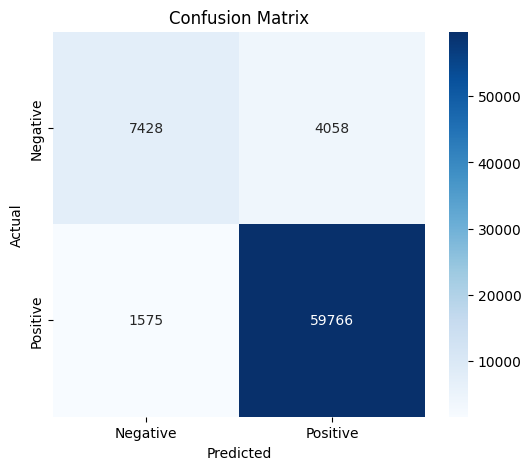

In [3]:
y_pred = model.predict(X_test_tfidf)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


C:\Users\M4 Tech\AppData\Local\Temp\ipykernel_7084\2204783903.py:22: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\M4 Tech\AppData\Local\Temp\ipykernel_7084\2204783903.py:22: UserWarning: Glyph 128162 (\N{ANGER SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\M4 Tech\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\M4 Tech\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128162 (\N{ANGER SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


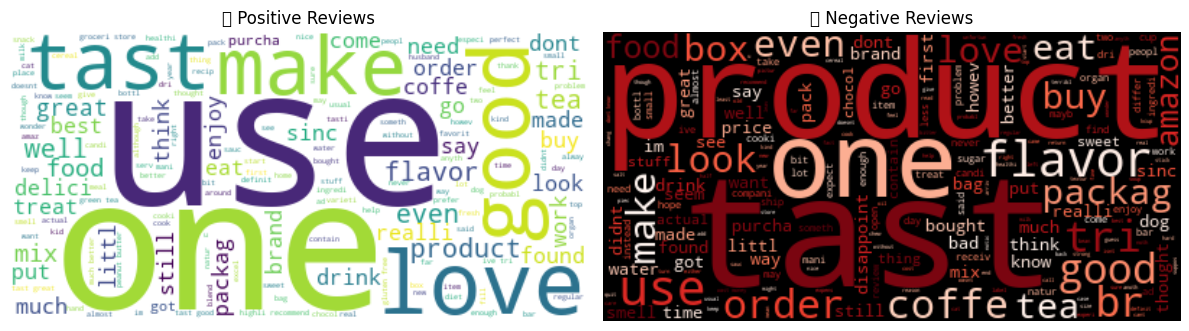

In [5]:
# Safely extract texts by sentiment
positive_text = ' '.join(test_df.loc[y_test[y_test == 1].index, 'text'])
negative_text = ' '.join(test_df.loc[y_test[y_test == 0].index, 'text'])

# Generate word clouds
wordcloud_pos = WordCloud(background_color='white', max_words=200).generate(positive_text)
wordcloud_neg = WordCloud(background_color='black', colormap='Reds', max_words=200).generate(negative_text)

# Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("🌟 Positive Reviews")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("💢 Negative Reviews")

plt.tight_layout()
plt.show()


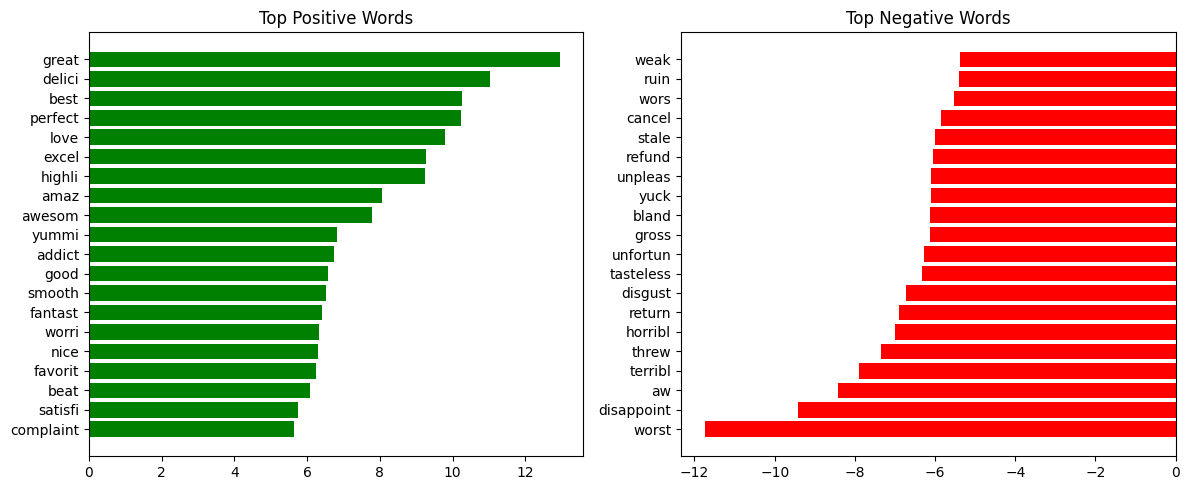

In [6]:
# Get feature names and weights
feature_names = tfidf.get_feature_names_out()
coefficients = model.coef_[0]

# Top Positive & Negative Words
top_pos = np.argsort(coefficients)[-20:]
top_neg = np.argsort(coefficients)[:20]

# Bar Plot
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.barh(range(20), coefficients[top_pos], color='green')
plt.yticks(range(20), [feature_names[i] for i in top_pos])
plt.title("Top Positive Words")

plt.subplot(1, 2, 2)
plt.barh(range(20), coefficients[top_neg], color='red')
plt.yticks(range(20), [feature_names[i] for i in top_neg])
plt.title("Top Negative Words")

plt.tight_layout()
plt.show()
